# Perkenalan

## Penulis

Tugas ini dibuat sebagai pemenuhan dari Graded Challange <a href= "https://github.com/FTDS-001/G1P0" target="_top">G1P0</a> oleh Arry Pandowo sebagai salah satu student dari Full Stack Data Science Batch 1 oleh Hacktiv8

## DataSet yang akan digunakan

Data set yang digunakan adalah data Pokemon dari berbagai generasi yang terdiri dari :

| Header      | Deskripsi |
| ----------- | ----------- |
| "#"      | merupakan identifikasi nomor dari pokemon dalam Pokedex, nomor yang sama menunjukan pokemon tersebut adalah pokemon yang sama namun tidak menutup kemungkinan dapat melakukan perubahan form (Mega Evolution)       |
| "Name"   | Nama Pokemon        |
| "Type 1"  | Tipe Pokemon 1       |
| "Type 2"   | Tipe Pokemon 2, beberapa pokemon dapat memiliki 2 Type      |
| "Total"  | Jumlah dari seluruh status        |
| "HP"   | singkatan dari Hit Points atau Health merupakan jumlah damage yang dapat diterima oleh Pokemon      |
| "Attack"  | Status modifier untuk skill dengan atribut normal attack        |
| "Defense" | resistan damage yang dapat diterima atas serangan normal attack       |
| "SP Atk" | Status modifier untuk skill dengan atribut elemen       |
| "SP Def" | resistan damage yang dapat diterima atas serangan dengan atribut elemen       |
| "Speed" | menentukan pokemon mana yang akan melakukan serangan terlebih dahulu      |
| "SP Atk" | Status modifier untuk skill dengan atribut elemen       |
|"Generation"| memberikan penjelasan  pokemon ini masuk dalam generasi berapa |
|"Legendary" | memberikan value boolean apakah pokemon tersebut masuk kedalam kategori Legendary atau tidak |



## Objektif

Tujuan dari pengolahan data ini adalah :
* Melihat 5 (Lima) Pokemon terkuat dari Elemen Grass & Fire sebagai populasi penelitian dilihat dari Total Status Penelitian
* Melihat kontribusi atas status "Attack" dan "SP Atk" sebagai status modifier dalam damage serangan dari Total Status dalam populasi penelitian
* Melihat kemungkinan pokemon dapat melakukan first Attack dilihat dari status "Speed" dalam populasi penelitian 
* Atas olahan data diatas akan dilakukan penarikan kesimpulan Pokemon terkuat didalam populasi penelitan utamanya dilihat dari aspek "Speed" sebagai status penentu dari pokemon untuk mendapatkan first attack dan status serangan ("Attack" & "SP Atk") sebagai penentu besaran damage yang akan diberikan kepada musuh.

# Library

In [460]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

untuk proses analisis dan presentasi data menggunakan list library diatas dengan detail penggunaan sebagai berikut
* pandas : manipulasi dataset Pokemon.csv yang dibentuk menjadi table
* numpy : manipulasi serta pengolahan data array atas dataset Pokemon.csv
* Matplotlib & Seaborn : Presentasi data sederhana atas analisis yang dilakukan   

# Data Loading

## Import Data ke Variable "Pokedex"

In [461]:
Pokedex = pd.read_csv('Pokemon.csv')

data yang digunakan bersumber dari <a href= "https://www.kaggle.com/abcsds/pokemon" target="_top">Kaggle</a> sesuai dengan instruksi yang diberikan

## Identifikasi data

### **Melihat info**

In [462]:
Pokedex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


### **melihat deskripsi data**

In [463]:
Pokedex.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


### **memastikan tidak ada data duplikat**

In [464]:
print(len(Pokedex["Name"].unique()))

800


seluruh data unique

### **melihat values**

In [465]:
Pokedex.values

array([[1, 'Bulbasaur', 'Grass', ..., 45, 1, False],
       [2, 'Ivysaur', 'Grass', ..., 60, 1, False],
       [3, 'Venusaur', 'Grass', ..., 80, 1, False],
       ...,
       [720, 'HoopaHoopa Confined', 'Psychic', ..., 70, 6, True],
       [720, 'HoopaHoopa Unbound', 'Psychic', ..., 80, 6, True],
       [721, 'Volcanion', 'Fire', ..., 70, 6, True]], dtype=object)

berdasarkan properties .values dapat dilihat Variable Pokedex memiliki 721 row data dengan jenis data array

### **melihat header**

In [466]:
Pokedex.head

<bound method NDFrame.head of        #                   Name   Type 1  Type 2  Total  HP  Attack  Defense  \
0      1              Bulbasaur    Grass  Poison    318  45      49       49   
1      2                Ivysaur    Grass  Poison    405  60      62       63   
2      3               Venusaur    Grass  Poison    525  80      82       83   
3      3  VenusaurMega Venusaur    Grass  Poison    625  80     100      123   
4      4             Charmander     Fire     NaN    309  39      52       43   
..   ...                    ...      ...     ...    ...  ..     ...      ...   
795  719                Diancie     Rock   Fairy    600  50     100      150   
796  719    DiancieMega Diancie     Rock   Fairy    700  50     160      110   
797  720    HoopaHoopa Confined  Psychic   Ghost    600  80     110       60   
798  720     HoopaHoopa Unbound  Psychic    Dark    680  80     160       60   
799  721              Volcanion     Fire   Water    600  80     110      120   

     Sp. 

berdasarkan deskripsi head diatas, seluruh penjelasan atas dataset dalam dataset yang akan digunakan tersedia

### **Identifikasi values NaN**

In [467]:
Pokedex.isnull().sum()


#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

terdapat nilai NaN sejumlah 386 pada Kolom "Type 2"

# Data Cleaning

## Data Cleaning

In [468]:
Pokedex.drop(columns = ["#", "Defense", "Sp. Def"], inplace = True)

* kolom "#" Pokedex tidak dibutuhkan karena identifikasi Mega Evolution dan Pokedex Entry tidak dibutuhkan
* Kolom "Defense" tidak dibutuhkan karena tidak dilakukan pengamatan atas defense dalam penelitian ini
* Kolom "Sp. Def" tidak dibutuhkan karena tidak dilakukan pengamatan atas Sp. Def dalam penelitian ini

Kolom Generation dan Legendary dapat digunakan lebih lanjut untuk clustering penentu apakah Generation tertentu lebih kuat dari yang lain atas Type tertentu begitu juga dengan "Legendary" Pokemon

## Simplify Nama Kolom 

In [469]:
Pokedex.rename(columns={"Type 1":"Type1", "Type 2":"Type2", "Sp. Atk":"SpcAtk"}, inplace = True)
Pokedex


,Name,Type1,Type2,Total,HP,Attack,SpcAtk,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,122,80,1,False
4,Charmander,Fire,NaN,309,39,52,60,65,1,False
...,...,...,...,...,...,...,...,...,...,...
795,Diancie,Rock,Fairy,600,50,100,100,50,6,True
796,DiancieMega Diancie,Rock,Fairy,700,50,160,160,110,6,True
797,HoopaHoopa Confined,Psychic,Ghost,600,80,110,150,70,6,True
798,HoopaHoopa Unbound,Psychic,Dark,680,80,160,170,80,6,True


agar lebih "code friendly", penggunaan spasi dalam nama kolom dihilangkan

## Mengubah data NaN menjadi No Element

In [470]:
Pokedex.fillna("No Element", inplace=True)

In [114]:
PokedexGF = Pokedex.loc[(Pokedex["Type1"]=="Grass") | (Pokedex["Type2"]=="Fire")]

,Name,Type1,Type2,Total,HP,Attack,Sp.Atk,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,122,80,1,False
48,Oddish,Grass,Poison,320,45,50,75,30,1,False
...,...,...,...,...,...,...,...,...,...,...
718,Chespin,Grass,No Element,313,56,61,48,38,6,False
719,Quilladin,Grass,No Element,405,61,78,56,57,6,False
720,Chesnaught,Grass,Fighting,530,88,107,74,64,6,False
740,Skiddo,Grass,No Element,350,66,65,62,52,6,False


## Filtering data dengan .loc

* Tipe Pokemon yang dibutuhkan hanya Pokemon yang memiliki Type Grass & Fire pada baik pada Type 1 ataupun Type 2

# Explorasi Data

## Pokemon terkuat Grass & Fire

dari data tersebut diatas maka didapat populasi final dari penelitian yakni Pokemon Grass & Fire baik dalam Type 1 ataupun Type 2, didapat Pokemon terkuat dengan stat terbanyak yakni sebagai berikut : 

In [472]:
PokedexGF.sort_values(['Total'], ascending=False)

,Name,Type1,Type2,Total,HP,Attack,SpcAtk,Speed,Generation,Legendary
424,GroudonPrimal Groudon,Ground,Fire,770,100,180,150,90,3,True
706,Reshiram,Dragon,Fire,680,100,120,150,90,5,True
275,SceptileMega Sceptile,Grass,Dragon,630,70,110,145,145,3,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,122,80,1,False
553,Victini,Psychic,Fire,600,100,100,100,100,5,True
...,...,...,...,...,...,...,...,...,...,...
668,Litwick,Ghost,Fire,275,50,30,65,20,5,False
467,Cherubi,Grass,No Element,275,45,35,62,35,4,False
202,Hoppip,Grass,Flying,250,35,35,35,50,2,False
296,Seedot,Grass,No Element,220,40,40,30,30,3,False


In [473]:
Big5PokedexGF = PokedexGF.sort_values(['Total'], ascending=False).head()

## Barplot status 5 pokemon based on Total

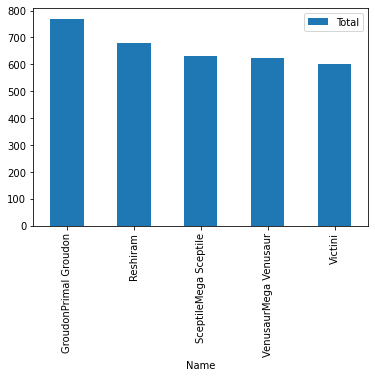

In [474]:
plot = Big5PokedexGF.plot.bar(x="Name", y="Total")

* Didapat 5 Pokemon terkuat dengan sebaran data 3 diantaranya adalah Legendary Pokemon dan 2 lainnya merupakan Mega Evolution

## Visualisasi sebaran Total Status

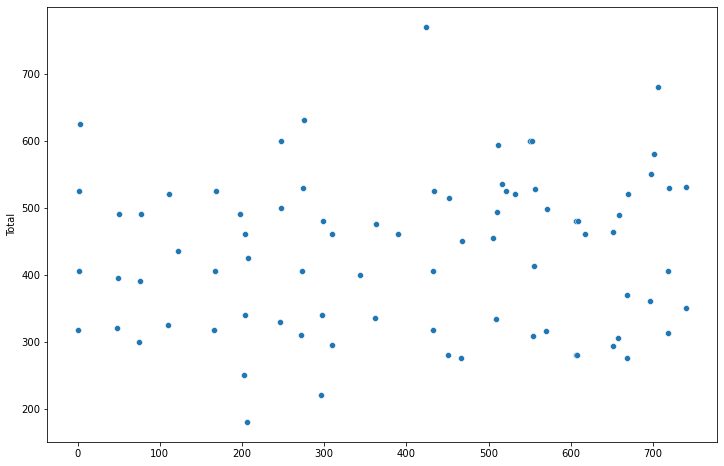

In [475]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=PokedexGF.index, y=PokedexGF['Total']);

Dapat dilihat bahwa sebaran status dalam PokedexGF tidak merata, 5 pokemon terkuat merupakan Pokemon Legendary atau Mega Evolution
* **Simpulan** : Pokemon Legendary/Mega Evolution merupakan Pokemon terkuat pada Elemen Grass & Fire

## Kontribusi status Attack & SP.Atk pada Total Status

In [476]:

kontAtk = ((PokedexGF.Attack + PokedexGF.SpcAtk)/PokedexGF.Total)*100
kontAtk = pd.DataFrame(KontAtk)
PokedexGF.insert(10, "kontAtk", kontAtk)

* Dalam fungsi sederhana diatas melakukan kalkulasi persentase stasus serangan terhadap total status dan diubah kedalam persentase
* Selanjutnya diubah kedalam dataframe untuk kemudian dimasukan kedalam PokedexGF

In [477]:
PokedexGF.sort_values(by=["Total","kontAtk"], ascending=[False, False]).head()

,Name,Type1,Type2,Total,HP,Attack,SpcAtk,Speed,Generation,Legendary,kontAtk
424,GroudonPrimal Groudon,Ground,Fire,770,100,180,150,90,3,True,42.857143
706,Reshiram,Dragon,Fire,680,100,120,150,90,5,True,39.705882
275,SceptileMega Sceptile,Grass,Dragon,630,70,110,145,145,3,False,40.476190
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,122,80,1,False,35.520000
248,HoundoomMega Houndoom,Dark,Fire,600,75,90,140,115,2,False,38.333333


Dapat dilihat bahwa victini tergeser oleh Mega Houndoom dikarenakan proporsi Kontribusi Attack Mega Houndoom lebih besar dibandingkan Victini

## Kontribusi status Speed pada Total Status

In [478]:
kontSpeed = ((Pokedex.Speed/PokedexGF.Total))*100
kontSpeed = pd.DataFrame(kontSpeed)
PokedexGF.insert(11, "kontSpeed", kontSpeed)

* Dalam fungsi sederhana diatas melakukan kalkulasi persentase kecepatan terhadap total status dan diubah kedalam persentase
* Selanjutnya diubah kedalam dataframe untuk kemudian dimasukan kedalam PokedexGF

In [479]:
PokedexGF.sort_values(by=["Total","kontSpeed","kontAtk"], ascending=[False, False, False]).head()

,Name,Type1,Type2,Total,HP,Attack,SpcAtk,Speed,Generation,Legendary,kontAtk,kontSpeed
424,GroudonPrimal Groudon,Ground,Fire,770,100,180,150,90,3,True,42.857143,11.688312
706,Reshiram,Dragon,Fire,680,100,120,150,90,5,True,39.705882,13.235294
275,SceptileMega Sceptile,Grass,Dragon,630,70,110,145,145,3,False,40.476190,23.015873
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,122,80,1,False,35.520000,12.800000
551,ShayminSky Forme,Grass,Flying,600,100,103,120,127,4,True,37.166667,21.166667


Dapat dilihat bahwa ketika dimasukkan kolom kontSpeed kedalam PokedexGF maka 5 Pokemon terkuat berdasarkan prioritas Total status adalah 5 Pokemon tersebut dengan posisi akhir Mega Houndoom tergeser oleh ShayminSky Forme

# Pengambilan Kesimpulan Akhir

* Pokemon Legendary mendominasi pokemon terkuat pada Type Grass & Fire diikuti oleh Mega Evolution, 2 jenis pokemon ini terlihat sangat over power jika dibandingkan dengan pokemon non legendary dan yang bukan Mega Evolution
* Dengan mempertimbangkan kontribusi Status serangan (SP Atk & Attack) serta kontribusi Speed maka Groudoun Primal form merupakan Pokemon terkuat dengan Tipe Fire, dengan mendapatkan turn 1 lebih tinggi dikarenakan kontribusi speed nya yang mencapai 11 % dengan nilai 90
* Pokemon Grass memiliki Speed yang jauh lebih tinggi dibandingkan dengan Pokemon Fire, namun kalah secara status jika dibandingkan dengan Pokemon Fire